# Use ASL dataset of your choice and build VGG-16 NET.
Dataset: https://www.kaggle.com/grassknoted/asl-alphabet

### Load necessary packages

In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import utils
import matplotlib.pyplot as plt



np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


### Include the ASL Dataset

In [3]:
train_directory = './ASL/asl_alphabet_train/asl_alphabet_train'
test_directory = './ASL/asl_alphabet_test/asl_alphabet_test'

CATAGORIES = []

for i in os.listdir(train_directory):
    CATAGORIES.append(i)
    
print(CATAGORIES)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


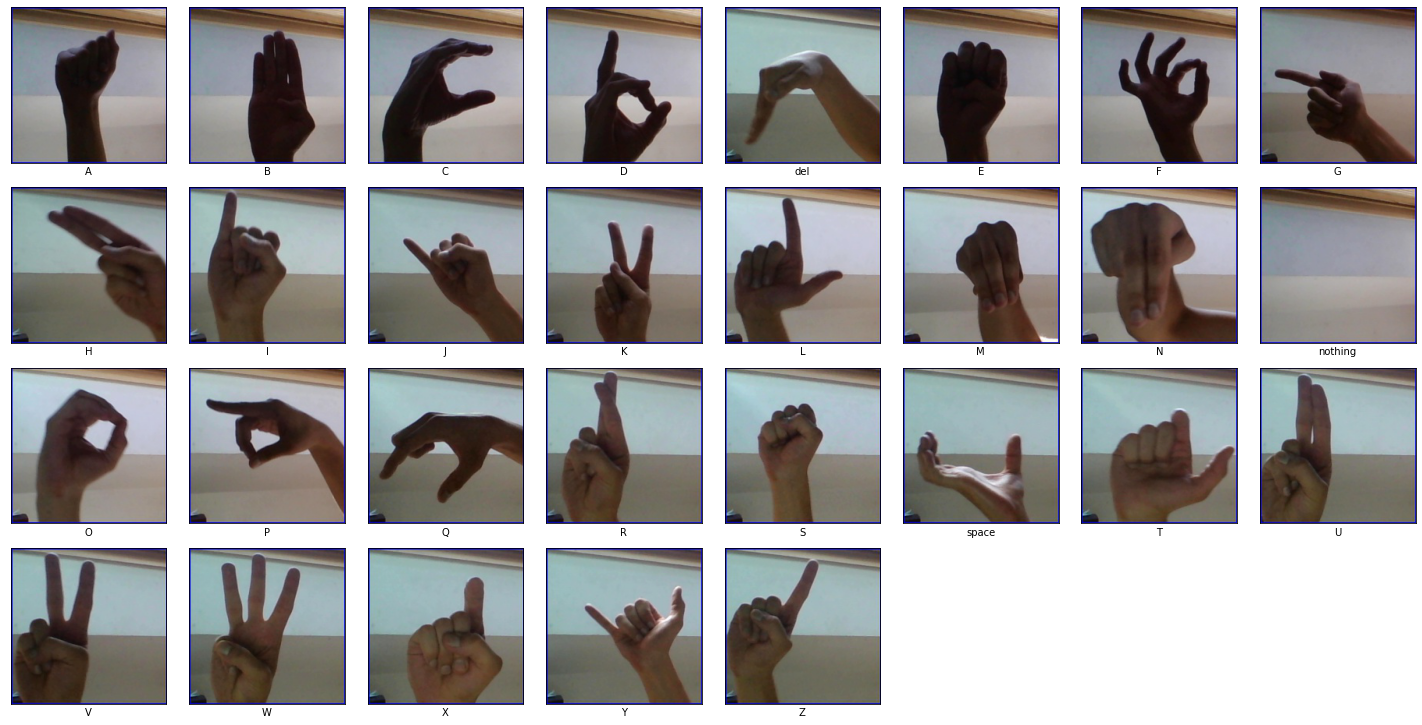

In [4]:
plt.figure(figsize=(20, 20))
for i in range (0,29):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_directory + "/{0}/{0}1.jpg".format(CATAGORIES[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(CATAGORIES[i])
    
plt.tight_layout()        
plt.show() 

### Load Dataset

In [5]:
def load_data(train_directory):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_directory):
        index +=1
        for image in os.listdir(train_directory + "/" + folder):
            temp_img = cv2.imread(train_directory + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_directory)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


### Build VGG-16 Model

In [6]:
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(512, activation='sigmoid'))
model.add(Dense(29, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

### Model Train

In [8]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

h = model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_split = 0.1, shuffle = True, verbose = 1)

Epoch 1/5
551/551 [==============================] - 101s 165ms/step - loss: 3.0198 - accuracy: 0.1037 - val_loss: 1.3521 - val_accuracy: 0.5017
Epoch 2/5
551/551 [==============================] - 88s 160ms/step - loss: 1.0853 - accuracy: 0.5986 - val_loss: 0.6727 - val_accuracy: 0.7729
Epoch 3/5
551/551 [==============================] - 88s 160ms/step - loss: 0.4457 - accuracy: 0.8379 - val_loss: 0.2448 - val_accuracy: 0.9174
Epoch 4/5
551/551 [==============================] - 88s 160ms/step - loss: 0.2207 - accuracy: 0.9224 - val_loss: 0.1473 - val_accuracy: 0.9535
Epoch 5/5
551/551 [==============================] - 88s 160ms/step - loss: 0.1302 - accuracy: 0.9542 - val_loss: 0.1123 - val_accuracy: 0.9613


### Ploting The training results

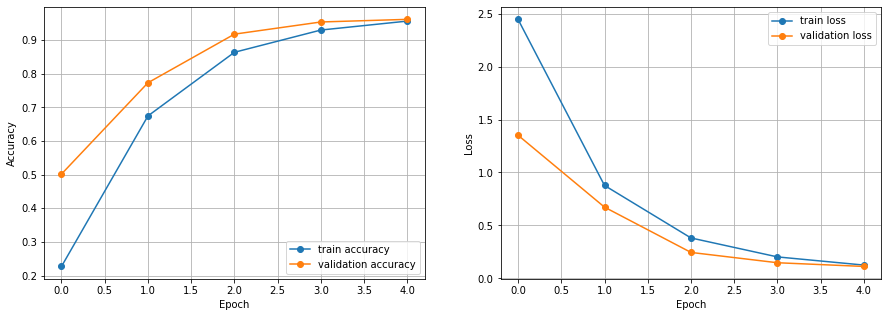

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


### Evaluate the model on the test dataset

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

272/272 [==============================] - 7s 24ms/step - loss: 0.1093 - accuracy: 0.9639

Test Accuracy: 0.9639080166816711

Test Loss: 0.10927311331033707
